In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import math
import pymc3 as pm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
N = 200

male_mean = 182
male_sd = 8

female_mean = 162
female_sd = 8

male_data = np.random.normal(male_mean, male_sd,  N // 2)

female_data = np.random.normal(female_mean, female_sd, N // 2)

all_data = np.concatenate([male_data, female_data])

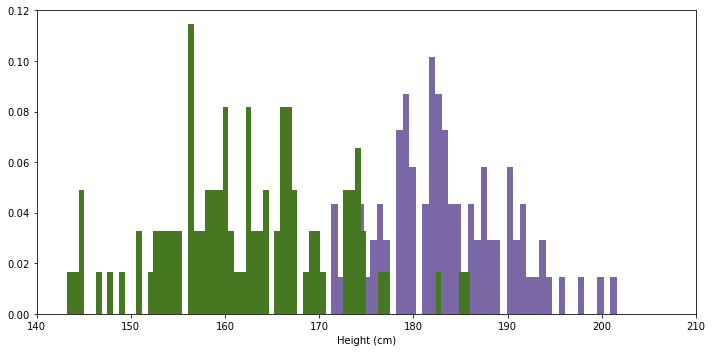

In [4]:
plt.figure(figsize=(10, 5))
plt.hist(male_data, bins = 70, color="#7A68A6", density=True)
plt.hist(female_data, bins = 70, color="#467821", density=True)
plt.xlim(140, 210);
plt.xlabel('Height (cm)')

plt.tight_layout();
plt.savefig('height.pdf')

In [5]:
print("Male: " + str(round(np.mean(male_data), 0)) + " +/- " + str(round(np.std(male_data), 0)))
print("Female: " + str(round(np.mean(female_data), 0)) + " +/- " + str(round(np.std(female_data), 0)))

Male: 182.0 +/- 8.0
Female: 162.0 +/- 9.0


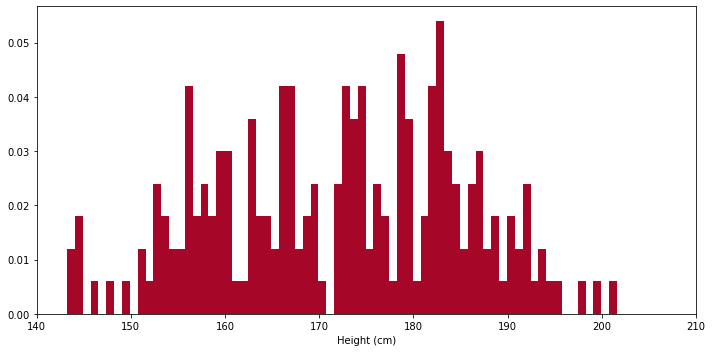

In [6]:
plt.figure(figsize=(10, 5))
plt.hist(all_data, bins = 70, color="#A60628", density=True)
plt.xlim(140, 210);
plt.xlabel('Height (cm)')

plt.tight_layout();
plt.savefig('combined.pdf')

In [7]:
model = pm.Model() 
    
with model:
    
    sd = pm.Exponential('sd', 1.0 / 10.0)
        
    mu = pm.Uniform("mu", 140, 190)

    male_or_female = pm.Bernoulli('male_or_female', 0.5, shape=N)
       
    offset = pm.Uniform("offset", 0, 40)

    height = pm.math.switch(male_or_female, mu, mu + offset)
    
    observation = pm.Normal("obs", mu=height, sd=sd, observed=all_data)

In [8]:
with model:
    
    trace = pm.sample(5000);

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [offset, mu, sd]
>BinaryGibbsMetropolis: [male_or_female]
Sampling 2 chains, 0 divergences: 100%|██████████| 11000/11000 [01:37<00:00, 112.49draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


In [9]:
female_samples = trace['mu']
male_samples = female_samples + trace['offset']
sd_samples = trace['sd']

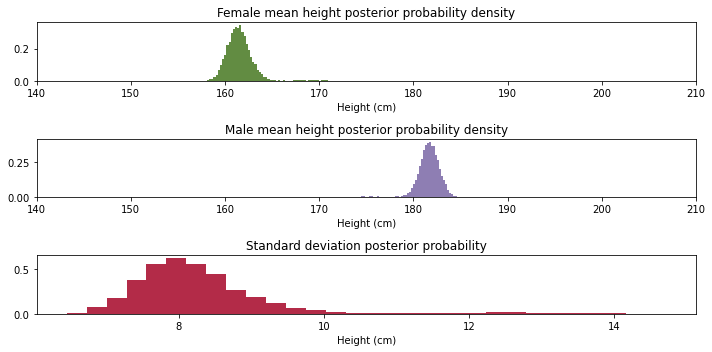

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(10, 5))

axes[0].hist(female_samples, histtype='stepfilled', bins=70, alpha=0.85, color="#467821", density=True)
axes[0].set_xlim(140, 210)
axes[0].set_xlabel('Height (cm)')
axes[0].set_title('Female mean height posterior probability density')

axes[1].hist(male_samples, histtype='stepfilled', bins=70, alpha=0.85, color="#7A68A6", density=True)
axes[1].set_xlim(140, 210)
axes[1].set_xlabel('Height (cm)')
axes[1].set_title('Male mean height posterior probability density')

axes[2].hist(sd_samples, histtype='stepfilled', bins=30, alpha=0.85, color="#A60628", density=True)
axes[2].set_xlabel('Height (cm)')
axes[2].set_title('Standard deviation posterior probability')

plt.tight_layout()
plt.savefig('posteriors.pdf')

In [11]:
male_or_female = np.mean(trace['male_or_female'], 0)


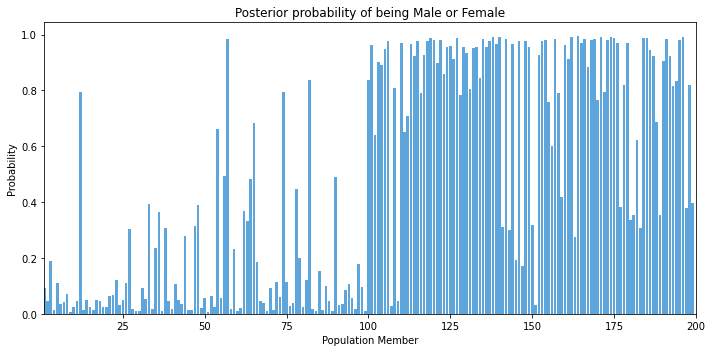

In [12]:
plt.figure(figsize=(10, 5))
plt.bar(np.arange(N), male_or_female, color="#5DA5DA")
plt.xlabel("Population Member")
plt.ylabel("Probability")
plt.title("Posterior probability of being Male or Female")
plt.xlim(1, N);

plt.tight_layout()
plt.savefig('male_or_female.pdf')